# Adaboost - algorithm - custom walk thru

### Recap

let $ G_m(x) \ m = 1,2,...,M $ be the sequence of weak classifiers, our objective is to build the following:

$$ G(x) = \text{sign} \left( \alpha_1 G_1(x) + \alpha_2 G_2(x) + ... \alpha_M G_M(x)\right) = \text{sign} \left( \sum_{m = 1}^M \alpha_m G_m(x)\right)$$ 

- The final prediction is a combination of the predictions from all classifiers through a weighted majority vote

- The coefficients $α_m$ are computed by the boosting algorithm, and weight the contribution of each respective $G_m(x)$. The effect is to give higher influence to the more accurate classifiers in the sequence.

- At each boosting step, the data is modified by applying weights $w_1$, $w_2$,..., $w_N$ to each training observation. At step m the observations that were misclassified previously have their weights increased

Note that at the first step m=1 the weights are initialized uniformly $w_i$ = 1/N

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns
sns.set_style('white')

from mlxtend.plotting import plot_decision_regions

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

### Dataset 

In [3]:
#Toy Dataset
x1 = np.array([.1,.2, .4,.8, .8, .05,.08,.12,.33,.55,.66,.77,.88,.2,.3,.4,.5,.6, .25,.3,.5, .7,.6])
x2 = np.array([.2,.65,.7,.6, .3, .1, .4, .66,.77,.65,.68,.55,.44,.1,.3,.4,.3,.15,.15,.5,.55,.2,.4])

# y = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1])

y = np.array([-1,-1,1,1,1,1,1,-1,-1,-1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,1])

X = np.vstack((x1,x2)).T


In [4]:
X[:5]

array([[0.1 , 0.2 ],
       [0.2 , 0.65],
       [0.4 , 0.7 ],
       [0.8 , 0.6 ],
       [0.8 , 0.3 ]])

In [5]:
def custom_decision_region(X, y, clf):
    
    # Parameters
    classes = [-1, 1]
    plot_colors = "br"
    plot_step = 0.02
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.axis("tight")

    # Plot the training points
    for i, class_label_pos, color in zip(classes, range(2), plot_colors):
        idx = np.where(y == i)
        
        plt.scatter(X[idx, 0], 
                    X[idx, 1], 
                    c=color, 
                    label=classes[class_label_pos],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

### Scatter plot of original data

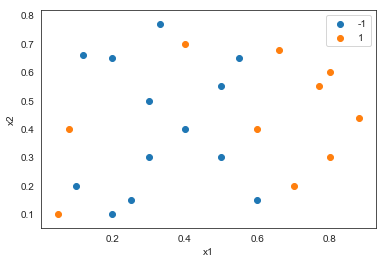

In [6]:
plt.scatter(X[y==-1][:, 0], X[y==-1][:, 1], label='-1');
plt.scatter(X[y== 1][:, 0], X[y== 1][:, 1], label='1');

# plt.xticks(np.arange(-1, 2, .5)) 
# plt.yticks(np.arange(-1, 2, .5)) 

plt.xlabel('x1')
plt.ylabel('x2');
plt.legend();

### use decision tree with (max_depth=1, max_leaf_nodes=2)

In [7]:
dt = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2)

dt.fit(X, y)

y_pred = dt.predict(X)

accuracy_score(y, y_pred)

0.8260869565217391

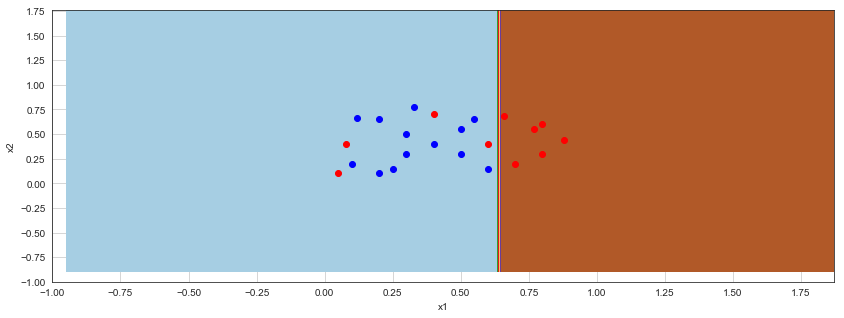

In [8]:
plt.figure(figsize=(14, 5))
plt.grid()

# mlxtend
custom_decision_region(X, y, clf=dt)

plt.xticks(np.arange(-1, 2, .25)) 
plt.yticks(np.arange(-1, 2, .25)) 

plt.xlabel('x1')
plt.ylabel('x2');

In [9]:
import graphviz 
from sklearn.tree import export_graphviz

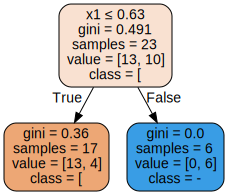

In [10]:
dot_data = export_graphviz( dt, 
                            out_file=None, 
                            feature_names=['x1', 'x2'],  
                            class_names= np.str(np.unique(y)),  
                            filled=True, 
                            rounded=True,  
                            special_characters=True)  

graph = graphviz.Source(dot_data)  

graph 

### with adaboost classifier

1.0

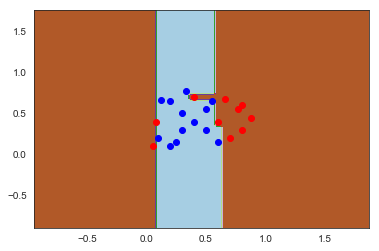

In [11]:
boost = AdaBoostClassifier( base_estimator = DecisionTreeClassifier(max_depth=1), 
                            algorithm = 'SAMME',
                            n_estimators=25, 
                            learning_rate=1.0)

boost.fit(X,y)

custom_decision_region(X, y, boost) 

boost.score(X,y)

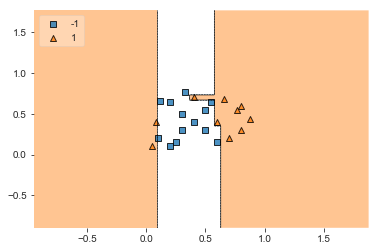

In [12]:
# mlxtend
plot_decision_regions(X, y, clf=boost, legend=2);

### Stepwise explanation

In [12]:
# No of iterations
M = 10

# set the learning rate
learning_rate = 1

# Initialization of utility variables
N = len(y)
estimator_list, y_predict_list, stump_error_list, stump_amt_of_say_list, sample_weight_list = [], [],[],[],[]

# Initialize the sample weights
sample_weight = np.ones(N) / N
sample_weight_list.append(sample_weight.copy())

# Fit a classifier
estimator = DecisionTreeClassifier(max_depth = 1, 
                                   max_leaf_nodes = 2)

In [13]:
sample_weight

array([0.04347826, 0.04347826, 0.04347826, 0.04347826, 0.04347826,
       0.04347826, 0.04347826, 0.04347826, 0.04347826, 0.04347826,
       0.04347826, 0.04347826, 0.04347826, 0.04347826, 0.04347826,
       0.04347826, 0.04347826, 0.04347826, 0.04347826, 0.04347826,
       0.04347826, 0.04347826, 0.04347826])

In [14]:
sample_weight_list

[array([0.04347826, 0.04347826, 0.04347826, 0.04347826, 0.04347826,
        0.04347826, 0.04347826, 0.04347826, 0.04347826, 0.04347826,
        0.04347826, 0.04347826, 0.04347826, 0.04347826, 0.04347826,
        0.04347826, 0.04347826, 0.04347826, 0.04347826, 0.04347826,
        0.04347826, 0.04347826, 0.04347826])]

In [16]:
estimator.fit(X, 
              y, 
              sample_weight=sample_weight)

y_predict = estimator.predict(X)

In [17]:
# Misclassifications
incorrect = (y_predict != y)
incorrect

array([False, False,  True, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True])

In [18]:
np.unique(incorrect, return_counts=True)

(array([False,  True]), array([19,  4], dtype=int64))

#### Numpy average

In [19]:
incorrect1     = np.array([10, 20])
sample_weight1 = [1, 1]

np.average(incorrect1, weights=sample_weight1, axis=0)

15.0

In [20]:
incorrect1     = np.array([10, 20])
sample_weight1 = [.1, .1]

np.average(incorrect1, weights=sample_weight1, axis=0)

15.0

In [21]:
incorrect1     = np.array([40, 20])
sample_weight1 = [.4, .8]

np.average(incorrect1, weights=sample_weight1, axis=0)

26.666666666666664

In [22]:
incorrect1     = np.array([True, 20])
sample_weight1 = [.4, .8]

np.average(incorrect1, weights=sample_weight1, axis=0)

13.666666666666664

In [23]:
incorrect1     = np.array([True, False])
sample_weight1 = [.4, .8]

np.average(incorrect1, weights=sample_weight1, axis=0)

0.3333333333333333

In [24]:
incorrect1     = np.array([False, False])
sample_weight1 = [.4, .8]

np.average(incorrect1, weights=sample_weight1, axis=0)

0.0

.. back to the code

#### Total Error for a stump
    Initial sample weight is = 1/ (total number of samples)

    Total Error for a stump = Sum of the weights associated with the incorrectly classified samples. 
    
$$ \Large Err_m = \frac{\sum_{i-1}^N w_i \mathcal{I}(y^{(i)} \neq G_m(x^{(i)}) )}{\sum_{i=1}^N w_i} $$


In [25]:
# total error
stump_error = np.average(incorrect, 
                         weights=sample_weight, 
                         axis=0)
stump_error

0.1739130434782609

#### Amount of Say for a stump

$$ \Large \alpha_m = \log \left( \frac{1 - err_m}{err_m}\right) $$

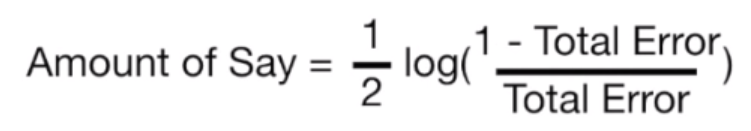

In [26]:
stump_amt_of_say =  learning_rate * np.log((1. - stump_error) / stump_error)
stump_amt_of_say

1.5581446180465497

#### Set sample weights

$$ \Large w_i \leftarrow w_i \exp[ \alpha_m \ \mathcal{I}(y^{(i)} \neq G_m(x^{(i)}))] $$

In [27]:
# initial sample weight
sample_weight

array([0.04347826, 0.04347826, 0.04347826, 0.04347826, 0.04347826,
       0.04347826, 0.04347826, 0.04347826, 0.04347826, 0.04347826,
       0.04347826, 0.04347826, 0.04347826, 0.04347826, 0.04347826,
       0.04347826, 0.04347826, 0.04347826, 0.04347826, 0.04347826,
       0.04347826, 0.04347826, 0.04347826])

In [28]:
stump_amt_of_say * incorrect

array([0.        , 0.        , 1.55814462, 0.        , 0.        ,
       1.55814462, 1.55814462, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.55814462])

In [29]:
np.exp(stump_amt_of_say) * incorrect 

array([0.  , 0.  , 4.75, 0.  , 0.  , 4.75, 4.75, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       4.75])

In [30]:
np.exp(stump_amt_of_say )* incorrect * ((sample_weight > 0) | (stump_amt_of_say < 0))

array([0.  , 0.  , 4.75, 0.  , 0.  , 4.75, 4.75, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       4.75])

In [31]:
# Boost sample weights (incorrect ones)
#sample_weight *= np.exp(stump_amt_of_say * incorrect * ((sample_weight > 0) | (stump_amt_of_say < 0)))

sample_weight_incorrect = sample_weight * np.exp(stump_amt_of_say) * incorrect 
sample_weight_incorrect

array([0.        , 0.        , 0.20652174, 0.        , 0.        ,
       0.20652174, 0.20652174, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.20652174])

In [32]:
# Boost sample weights (correct ones)
#sample_weight *= np.exp(stump_amt_of_say * incorrect * ((sample_weight > 0) | (stump_amt_of_say < 0)))

sample_weight_correct = sample_weight * np.exp(-stump_amt_of_say) * ~incorrect 
sample_weight_correct

array([0.00915332, 0.00915332, 0.        , 0.00915332, 0.00915332,
       0.        , 0.        , 0.00915332, 0.00915332, 0.00915332,
       0.00915332, 0.00915332, 0.00915332, 0.00915332, 0.00915332,
       0.00915332, 0.00915332, 0.00915332, 0.00915332, 0.00915332,
       0.00915332, 0.00915332, 0.        ])

In [33]:
sample_weight = sample_weight_incorrect + sample_weight_correct
sample_weight

array([0.00915332, 0.00915332, 0.20652174, 0.00915332, 0.00915332,
       0.20652174, 0.20652174, 0.00915332, 0.00915332, 0.00915332,
       0.00915332, 0.00915332, 0.00915332, 0.00915332, 0.00915332,
       0.00915332, 0.00915332, 0.00915332, 0.00915332, 0.00915332,
       0.00915332, 0.00915332, 0.20652174])

$$ \Large G(x) = \text{sign} \left[ \sum_{m=1}^M \alpha_m G_m(x)\right] $$

In [34]:
# Save iteration values
estimator_list.append(estimator)
y_predict_list.append(y_predict.copy())

stump_error_list.append(stump_error.copy())
stump_amt_of_say_list.append(stump_amt_of_say.copy())
sample_weight_list.append(sample_weight.copy())

# Convert to np array for convenience   
estimator_list        = np.array(estimator_list)
y_predict_list        = np.array(y_predict_list)

stump_error_list      = np.array(stump_error_list)
stump_amt_of_say_list = np.array(stump_amt_of_say_list)
sample_weight_list    = np.array(sample_weight_list)

In [35]:
y_predict_list

array([[-1, -1, -1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1, -1,
        -1, -1, -1, -1, -1,  1, -1]])

#### numpy.sign

Returns an element-wise indication of the sign of a number.

The sign function returns 

    -1 if x <  0, 
     0 if x == 0, 
     1 if x >  0

In [36]:
np.sign([10, 0, -10])

array([ 1,  0, -1])

.. back to the main code

In [37]:
for point in range(N):
    y_predict_list[:, point] * stump_amt_of_say_list

In [38]:
np.array([np.sign(y_predict_list[:, point] * stump_amt_of_say_list)])

array([[-1.]])

In [39]:
# Final Predictions
preds = (np.array([np.sign((y_predict_list[:, point] * stump_amt_of_say_list).sum()) for point in range(N)]))

print('Accuracy = ', (preds == y).sum() / N) 

# return estimator_list, estimator_weight_list, sample_weight_list


Accuracy =  0.8260869565217391


### Running them all together in a loop

In [40]:
# No of samples
N = len(y)

# No of iterations
M = 25

# set the learning rate
learning_rate = 1

# Initialization of utility variables
estimator_list, y_predict_list, stump_error_list, stump_amt_of_say_list, sample_weight_list = [], [],[],[],[]

# Initialize the sample weights
sample_weight = np.ones(N) / N
sample_weight_list.append(sample_weight.copy())

# For m = 1 to M
for m in range(M): 
        
    # Fit a classifier
    estimator = DecisionTreeClassifier(max_depth = 1, 
                                       max_leaf_nodes = 2)

    estimator.fit(X, 
                  y, 
                  sample_weight=sample_weight)

    y_predict = estimator.predict(X)
    
    # Misclassifications
    incorrect = (y_predict != y)

    # total error
    stump_error = np.average(incorrect, 
                             weights=sample_weight, 
                             axis=0)

    stump_amt_of_say =  learning_rate * np.log((1. - stump_error) / stump_error)

    sample_weight_incorrect = sample_weight * np.exp(stump_amt_of_say)  * incorrect 
    sample_weight_correct   = sample_weight * np.exp(-stump_amt_of_say) * ~incorrect 

    sample_weight = sample_weight_incorrect + sample_weight_correct

    # Save iteration values
    estimator_list.append(estimator)
    y_predict_list.append(y_predict.copy())

    stump_error_list.append(stump_error.copy())
    stump_amt_of_say_list.append(stump_amt_of_say.copy())
    sample_weight_list.append(sample_weight.copy())

In [41]:
# Convert to np array for convenience   
estimator_list        = np.array(estimator_list)
y_predict_list        = np.array(y_predict_list)

stump_error_list      = np.array(stump_error_list)
stump_amt_of_say_list = np.array(stump_amt_of_say_list)
sample_weight_list    = np.array(sample_weight_list)

# Predictions
preds = (np.array([np.sign((y_predict_list[:, point] * stump_amt_of_say_list).sum()) for point in range(N)]))
print('Accuracy = ', (preds == y).sum() / N) 

Accuracy =  0.9130434782608695


#### Visualize the decision region of the stump

C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\matplotlib\contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


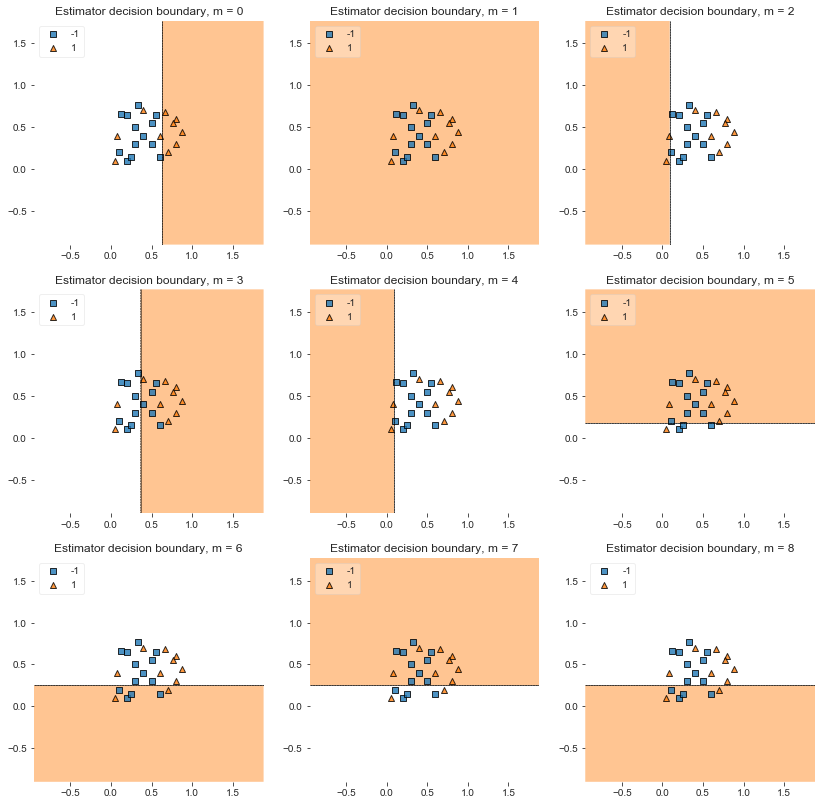

In [42]:
fig = plt.figure(figsize = (14, 14))

for m in range(0, 9):
    fig.add_subplot(3, 3, m+1)
        
    # mlxtend
    plot_decision_regions(X, 
                          y, 
                          clf=estimator_list[m],
                          legend=2)

    
    plt.title('Estimator decision boundary, m = {}'.format(m))

#### using custom decision region

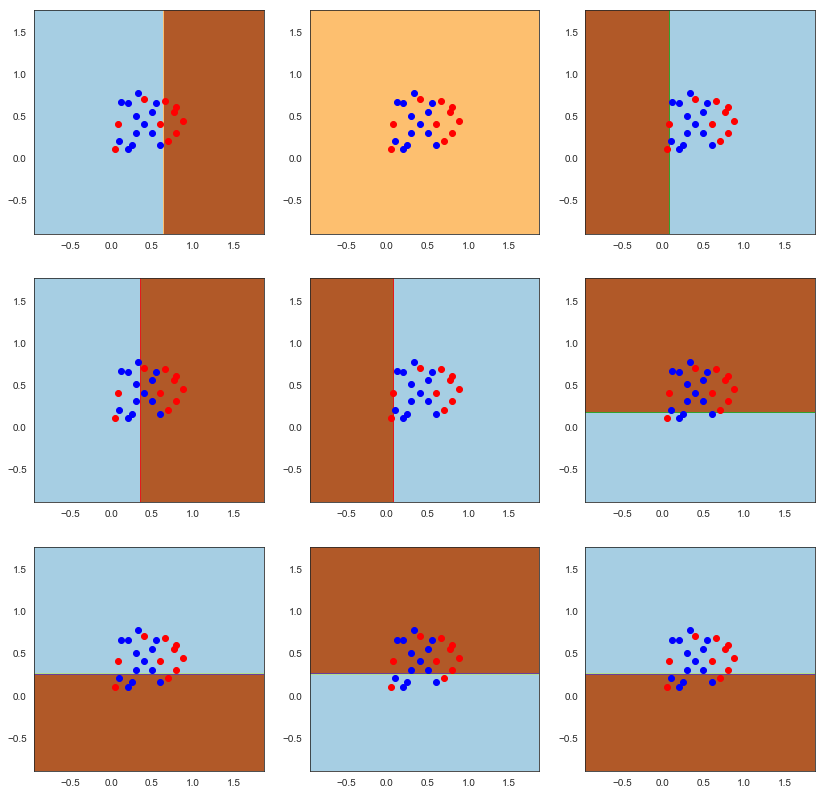

In [44]:
fig = plt.figure(figsize = (14, 14))

for m in range(0, 9):
    fig.add_subplot(3, 3, m+1)
    
    custom_decision_region(X, 
                           y,
                           estimator_list[m]
                          )

# predict(self, X)
Predict classes for X.

The predicted class of an input sample is computed as the weighted mean prediction of the classifiers in the ensemble.

__Parameters__

    X : {array-like, sparse matrix} of shape = [n_samples, n_features]
    The training input samples. Sparse matrix can be CSC, CSR, COO, DOK, or LIL. COO, DOK, and LIL are converted to CSR.

__Returns__:

    y : array of shape = [n_samples]
    The predicted classes.

In [45]:
y_pred_list_test_sample =[]

test_sample   = [[.36, .45]]

# no of samples
N = len(test_sample)

for m in range(M):
   
    model  = estimator_list[m]
    
    y_pred_test_sample = model.predict(test_sample)
    y_pred_list_test_sample.append(y_pred_test_sample.copy())
    
y_pred_list_test_sample = np.array(y_pred_list_test_sample)
    
# Final Prediction
pred = (np.array([np.sign((y_pred_list_test_sample[:, point] * stump_amt_of_say_list).sum()) for point in range(N)]))

print('Final prediction for the test sample {} is {}'.format(test_sample, pred))

Final prediction for the test sample [[0.36, 0.45]] is [-1.]


# The impact of Learning Rate L and the number of weak classifiers M

- Decreasing the learning rate Lmakes the coefficients $α_m$ smaller, which reduces the amplitude of the sample_weights at each step (since $w_i$ ← $w_i.e^{α_m}... )$. This translates into smaller variations of the weighted data points and therefore fewer differences between the weak classifier decision boundaries

- Increasing the number of weak classifiers M increases the number of iterations, and allows the sample weights to gain greater amplitude. This translates into 

    1) more weak classifiers to combine at the end, and 
    
    2) more variations in the decision boundaries of these classifiers. 

Put together these effects tend to lead to more complex overall decision boundaries.

From this intuition, it would make sense to see a trade-off between the parameters L and M. Increasing one and decreasing the other will tend to cancel the effect.